# Taller evaluable sobre la extracción, transformación y visualización de datos usando IPython

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia 

# Instrucciones

En la carpeta 'Taller' del repositorio 'ETVL-IPython' se encuentran los archivos 'Precio_Bolsa_Nacional_($kwh)_'*'.xls' en formato de Microsoft Excel, los cuales contienen los precios históricos horarios de la electricidad para el mercado eléctrico Colombiano entre los años 1995 y 2017 en COL-PESOS/kWh. A partir de la información suministrada resuelva los siguientes puntos usando el lenguaje de programación Python. 

# Preguntas

**1.--** Lea los archivos y cree una tabla única concatenando la información para cada uno de los años. Imprima el encabezamiento de la tabla usando `head()`. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
from metakernel import register_ipython_magics
register_ipython_magics() 

In [2]:
x=[]
for n in range(1995,2018):
    if n < 2000:
        skip = 3
    else: 
        skip=2
    
    nombrearchivo= 'Precio_Bolsa_Nacional_($kwh)_'+str(n)
    if n>=2016:
        nombrearchivo +='.xls'
    else:
        nombrearchivo+='.xlsx'
    y = pd.read_excel(nombrearchivo, skiprows=skip, parse_cols=24)
    x.append(y)
    z=pd.concat(x)
    print(z.head())
    print(z.tail())

        Fecha      0      1      2      3      4      5      6      7      8  \
0  1995-07-20    NaN  1.073  1.073  1.073  1.073  1.073  1.073  1.073  1.074   
1  1995-07-21  1.073  1.000  1.000  1.000  1.000  1.000  5.000  6.000  6.000   
2  1995-07-22  1.073  1.073  1.000  1.000  1.000  1.073  1.303  1.303  1.303   
3  1995-07-23  1.073  1.000  1.000  1.000  1.000  1.000  0.100  1.000  1.000   
4  1995-07-24  1.000  1.000  0.990  1.000  1.000  1.073  3.000  3.000  3.000   

   ...       14     15     16     17      18      19      20     21     22  \
0  ...    1.073  1.073  1.073  1.073   1.074   1.897   1.897  1.897  1.073   
1  ...    5.000  1.000  1.000  5.000  12.000  16.670  11.929  5.000  1.000   
2  ...    1.073  1.000  1.000  1.000   1.303   2.500   2.500  1.303  1.073   
3  ...    1.000  0.100  0.100  1.000   1.238   1.238   1.238  1.238  1.073   
4  ...    1.073  1.073  3.000  2.000  18.630  22.500   9.256  3.000  1.073   

      23  
0  1.073  
1  1.000  
2  1.073  
3  1.0

**2.--** Compute e imprima el número de registros con datos faltantes.

In [3]:
len(z)-len(z.dropna())

28

**3.--** Compute e imprima el número de registros duplicados.

In [4]:
len(z)-len(z.drop_duplicates())

67

**4.--** Elimine los registros con datos duplicados o datos faltantes, e imprima la cantidad de registros que quedan (registros completos).

In [5]:
z=z.dropna().drop_duplicates()
len(z)

7875

**5.--** Compute y grafique el precio primedio diario.

In [6]:
prom=z.mean(axis=1)
prom

1       4.924333
2       1.269500
3       0.953083
4       4.305917
5       1.149167
6       1.108625
7       0.585958
8       0.499792
9       0.927667
10      0.669458
11      0.679458
12      1.106917
13      1.077500
14      1.517917
15      1.786042
16      2.383792
17      2.387583
18      3.707208
19      6.650000
20     13.991958
21     20.041667
22     21.191667
23     30.710750
24     34.327833
25     33.190250
26     14.513250
27      8.664333
28      1.813250
29      1.941667
30      1.101833
         ...    
13     69.696400
14     84.918995
15     89.348661
16     96.043590
17    111.541249
18    105.999284
19    110.215487
20    101.231979
21     75.254842
22    115.965815
23    148.968501
24    130.411958
25    144.226841
26    132.357035
27    122.145329
28    132.564871
29    133.677754
30    122.424193
31    103.459761
32    105.866599
33    110.059089
34    127.794467
35     90.072541
36    119.555657
37    146.880526
38    131.514214
39    133.727413
40    167.1281

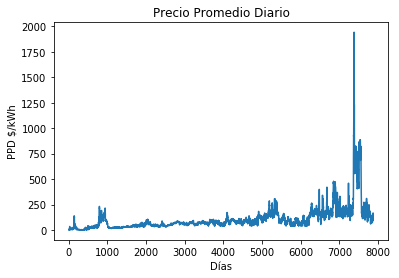

In [7]:
plt.title("Precio Promedio Diario")
plt.xlabel("Días")
plt.ylabel("PPD $/kWh")
plt.plot(range(len(prom)), prom)
plt.show()

**6.--** Compute y grafique el precio máximo por mes.

In [8]:
w=[]
for n in range(len(z['Fecha'])):
    w.append(str(z.iloc[n,0])[0:7])
z['Mensual'] = w
z.head()

,Fecha,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,Mensual
1,1995-07-21,1.073,1.000,1.000,1.00,1.00,1.000,5.000,6.000,6.000,...,1.000,1.000,5.000,12.000,16.670,11.929,5.000,1.000,1.000,1995-07
2,1995-07-22,1.073,1.073,1.000,1.00,1.00,1.073,1.303,1.303,1.303,...,1.000,1.000,1.000,1.303,2.500,2.500,1.303,1.073,1.073,1995-07
3,1995-07-23,1.073,1.000,1.000,1.00,1.00,1.000,0.100,1.000,1.000,...,0.100,0.100,1.000,1.238,1.238,1.238,1.238,1.073,1.000,1995-07
4,1995-07-24,1.000,1.000,0.990,1.00,1.00,1.073,3.000,3.000,3.000,...,1.073,3.000,2.000,18.630,22.500,9.256,3.000,1.073,1.000,1995-07
5,1995-07-25,0.990,0.990,0.989,0.99,0.99,1.073,1.263,1.263,1.263,...,1.073,1.073,1.073,1.263,1.500,1.263,1.263,1.073,0.990,1995-07


In [9]:
zmax=z.groupby('Mensual').max()
zmax=zmax.max(axis=1)
zmax

Mensual
1995-07      22.500000
1995-08      40.000000
1995-09      40.572000
1995-10      33.700000
1995-11     111.907000
1995-12     179.730000
1996-01      50.000000
1996-02      75.000000
1996-03      15.514000
1996-04      18.000000
1996-05      21.071000
1996-06      20.200000
1996-07      23.258000
1996-08      28.000000
1996-09      28.000000
1996-10      30.000000
1996-11     122.674000
1996-12      46.000000
1997-01      37.580270
1997-02      51.494800
1997-03      59.243940
1997-04      48.101270
1997-05      55.130430
1997-06      57.946830
1997-07      94.238310
1997-08     114.944080
1997-09     273.376400
1997-10     208.171070
1997-11     221.487200
1997-12     215.468750
              ...     
2014-09     341.729009
2014-10     405.382900
2014-11     222.937772
2014-12     230.807784
2015-01     276.298659
2015-02     239.241568
2015-03     281.771171
2015-04     235.134553
2015-05     686.494571
2015-06     352.369464
2015-07     314.731444
2015-08     305.708714
201

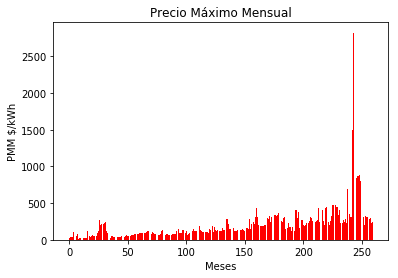

In [10]:
plt.title("Precio Máximo Mensual")
plt.xlabel("Meses")
plt.ylabel("PMM $/kWh")
plt.bar(range(len(zmax)), zmax,color = "r")
plt.show()

**7.--** Compute y grafique el precio mínimo mensual.

In [11]:
zmin=z.groupby('Mensual').min()
zmin=zmin.min(axis=1)
zmin

Mensual
1995-07      0.000000
1995-08      0.000000
1995-09      1.073000
1995-10      0.000000
1995-11      1.072000
1995-12      1.074000
1996-01      1.073000
1996-02      1.076000
1996-03      1.255000
1996-04      1.254000
1996-05      0.000000
1996-06      0.000000
1996-07      0.000000
1996-08      1.253000
1996-09      1.260000
1996-10      1.255000
1996-11      1.254000
1996-12      1.256000
1997-01     12.221270
1997-02     13.989800
1997-03     13.231940
1997-04     13.401270
1997-05     13.927430
1997-06     17.446830
1997-07     10.882310
1997-08     15.944080
1997-09     30.376400
1997-10     40.171070
1997-11     19.014200
1997-12     50.496750
              ...    
2014-09     79.146645
2014-10     67.969028
2014-11     41.236232
2014-12     45.734170
2015-01     46.791501
2015-02    116.731352
2015-03    112.727498
2015-04    109.212684
2015-05     66.170951
2015-06     51.116576
2015-07    122.475484
2015-08    106.781142
2015-09    169.414093
2015-10    116.475435
20

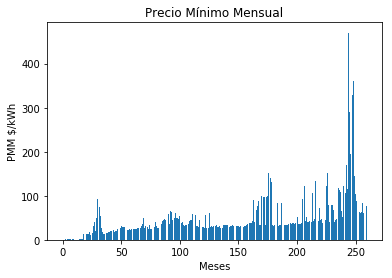

In [12]:
plt.title("Precio Mínimo Mensual")
plt.xlabel("Meses")
plt.ylabel("PMM $/kWh")
plt.bar(range(len(zmin)), zmin)
plt.show()

**8.--** Haga un gráfico para comparar el precio máximo del mes (para cada mes) y el precio promedio mensual.

In [13]:
zmean=z.groupby('Mensual').mean()
zmean=zmean.mean(axis=1)
zmean

Mensual
1995-07       1.552087
1995-08       7.086462
1995-09      10.955819
1995-10      10.445442
1995-11      27.534782
1995-12      68.876234
1996-01      23.008071
1996-02       8.044093
1996-03       3.460622
1996-04       3.040025
1996-05       1.809852
1996-06       1.889136
1996-07       1.649266
1996-08       3.717004
1996-09      15.894114
1996-10       5.523819
1996-11      20.601340
1996-12      14.869731
1997-01      21.623433
1997-02      26.916226
1997-03      25.705822
1997-04      25.252256
1997-05      35.462962
1997-06      33.356151
1997-07      31.958213
1997-08      38.467690
1997-09     138.986063
1997-10     137.127820
1997-11     132.435171
1997-12     128.869191
              ...     
2014-09     177.318519
2014-10     207.026344
2014-11     166.568139
2014-12     175.054653
2015-01     187.595911
2015-02     166.231229
2015-03     205.502951
2015-04     161.304436
2015-05     259.198931
2015-06     186.416549
2015-07     206.158070
2015-08     183.708405
201

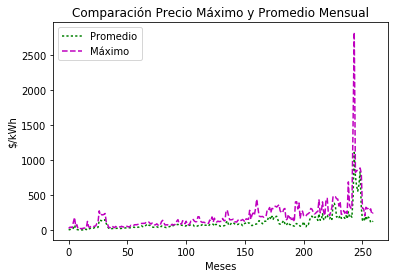

In [14]:
plt.title("Comparación Precio Máximo y Promedio Mensual")
plt.xlabel("Meses")
plt.ylabel("$/kWh")
plt.plot(pd.Series(zmean).values,linestyle=':', color='g',label="Promedio")
plt.plot(pd.Series(zmax).values,linestyle='--', color='m',label="Máximo")
plt.legend(loc="upper left")

**9.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días laborales.

In [15]:
from datetime import datetime, date, time, timedelta
import calendar

#Define los Dias de la semana en base a la Fecha
fecha=[]
fecha=z['Fecha']
z['Fecha']=pd.to_datetime(z['Fecha'], format="%Y-%m-%d")
z['Dia']=z['Fecha'].dt.weekday_name

#Filtrado de Dias

Lab = z['Dia'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])
Lab = z[Lab]

In [16]:
indicador = ['{}'.format(n) for n in range(len(Lab))]
Lab.index = indicador

In [17]:
u=[]
for n in range(len(Lab)):
    x = pd.Series(Lab.loc[str(n)]).values[1:25]
    u.append ([i for i, e in enumerate(x) if e == max(x)])

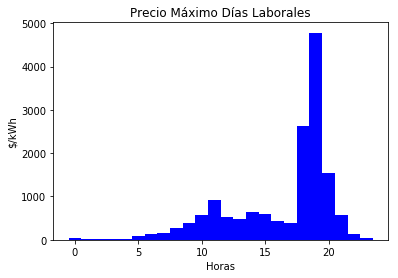

In [18]:
a = []
for n in range(len(u)):
    for i in range(len(u[n])):
        a.append(u[n][i])

rep=[]

for n in range(24):
    rep.append(a.count(n))
plt.bar(range(24),rep,color='b',width=1)
plt.title("Precio Máximo Días Laborales")
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.show()

**10.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días sabado.

In [19]:
#Define los Dias de la semana en base a la Fecha

Sat = z['Dia'].isin(['Saturday'])
Sat = z[Sat]

In [20]:
indicador = ['{}'.format(n) for n in range(len(Sat))]
Sat.index = indicador

In [21]:
s=[]
for n in range(len(Sat)):
    x = pd.Series(Sat.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])

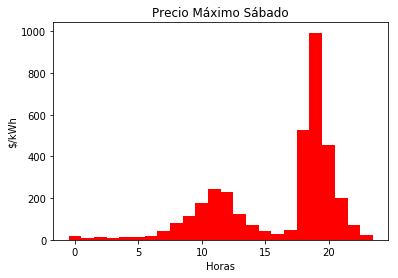

In [22]:
a= []
for n in range(len(s)):
    for i in range(len(s[n])):
        a.append(s[n][i])

rep=[]

for n in range(24):
    rep.append(a.count(n))
plt.bar(range(24),rep,color='r',width=1)
plt.title("Precio Máximo Sábado")
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.show()

**11.--** Haga un histograma que muestre a que horas se produce el máximo precio diario para los días domingo.

In [24]:
#Filtrado de Dias

Sun = z['Dia'].isin(['Sunday'])
Sun = z[Sun]

In [25]:
indicador = ['{}'.format(n) for n in range(len(Sun))]
Sun.index = indicador

In [26]:
s=[]
for n in range(len(Sun)):
    x = pd.Series(Sun.loc[str(n)]).values[1:25]
    s.append ([i for i, e in enumerate(x) if e == max(x)])

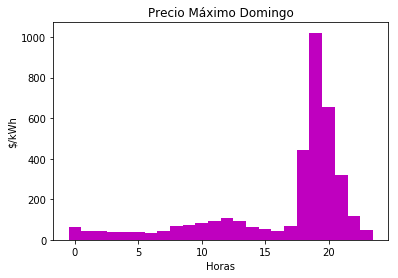

In [27]:
a= []
for n in range(len(s)):
    for i in range(len(s[n])):
        a.append(s[n][i])

rep=[]

for n in range(24):
    rep.append(a.count(n))
plt.bar(range(24),rep,color='m',width=1)
plt.title("Precio Máximo Domingo")
plt.xlabel("Horas")
plt.ylabel("$/kWh")
plt.show()

**12.--** Imprima una tabla con la fecha y el valor más bajo por año del precio de bolsa.

In [29]:
wry=[]
for n in range(len(z['Fecha'])):
    wry.append(str(z.iloc[n,0])[0:4])
z['Anio'] = wry
minanio=z.groupby('Anio').min()
minanio=minanio.min(axis=1)
minanio

Anio
1995     0.000000
1996     0.000000
1997    10.882310
1998    13.847330
1999    18.359530
2000    21.531167
2001    24.822879
2002    26.777682
2003    37.013438
2004    32.252998
2005    27.581415
2006    26.714797
2007    30.173824
2008    29.199135
2009    32.892503
2010    32.024957
2011    33.291100
2012    34.988099
2013    40.415346
2014    38.941951
2015    46.791501
2016    61.100689
2017    61.356315
dtype: float64

**13.--** Haga una gráfica en que se muestre el precio promedio diario y el precio promedio mensual.

In [30]:
indicador = ['{}'.format(n) for n in range(len(z))]
z.index = indicador


z['Mensual'][10]

'1995-07'

In [31]:
# con esto puedo calcular el promedio en funcion de n cuando n va hasta la longuitud de z
y=z.groupby('Mensual')
f=z.loc[y.groups[z['Mensual'][43]]].mean() #El entero sera n
f.mean()

10.955819444444446

In [32]:
pmes=[]
for n in range (len(z)):
    y=z.groupby('Mensual')
    f=z.loc[y.groups[z['Mensual'][n]]].mean() #El entero sera n
    f=f.mean()
    pmes.append(f)

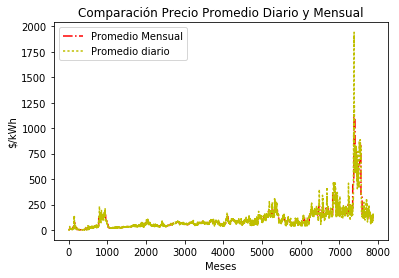

In [33]:
plt.title("Comparación Precio Promedio Diario y Mensual")
plt.xlabel("Meses")
plt.ylabel("$/kWh")
plt.plot(pd.Series(pmes).values,linestyle='-.', color='r',label="Promedio Mensual")
plt.plot(pd.Series(prom).values,linestyle=':', color='y',label="Promedio diario")
plt.legend(loc="upper left")